In [41]:
tdir = "/Users/sshanto/LFL/QPTrapper/Legacy/data/run1/correlated_periodic_stochastic_10_5_0.5/run_2022_04_26_08_10_AM"

In [42]:
import glob

pickle_files = glob.glob(tdir+"/*pickle")

In [43]:
pickle_files[0]

'/Users/sshanto/LFL/QPTrapper/Legacy/data/run1/correlated_periodic_stochastic_10_5_0.5/run_2022_04_26_08_10_AM/qp_trapper_correlated_periodic_stochastic_10_5_0.5_2022_04_26-08_10_30_AM.pickle'

In [47]:
res_pickle = pickle_files[1]
qpt_pickle = pickle_files[0]

In [48]:
import dill

res_obj = dill.load(open(res_pickle, 'rb'))
qpt_obj = dill.load(open(qpt_pickle, 'rb'))

res_obj, qpt_obj

(<__main__.NBResonator at 0x7fb0f40a2790>,
 <__main__.QPtrapper at 0x7fb0d9e29eb0>)

In [49]:
stime = (np.arange(qpt_obj.N) / qpt_obj.sampleRate) * 1e3  #ms
ltimes = [(i / qpt_obj.sampleRate) * 1e3 for i in qpt_obj.lifeTimes]

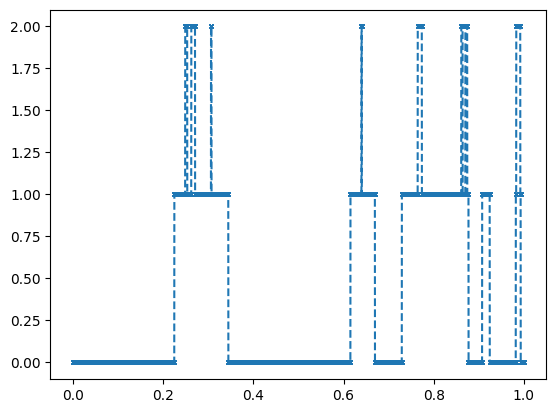

In [60]:
plt.plot(stime, qpt_obj.nTrapped, '--x', markersize=3)
plt.show()

In [32]:
def getTransitionFrequency(nTrapped, g_occ, e_occ):
    counter = 0
    for i, occ in enumerate(nTrapped):
        try:
            if occ == e_occ and nTrapped[i+1] == g_occ:
                counter+=1
        except:
            pass
    return counter

def getTransitionFrequencySweep(nTrapped, g_occ):
    transitions = []
    e_occ_max = max(nTrapped)
    for i in range(e_occ_max+1):
        transitions.append(getTransitionFrequency(nTrapped, g_occ, i))
    return transitions

def getTransitionFrequencySingleJump(nTrapped):
    transitions = []
    e_occ_max = max(nTrapped)
    for i in range(e_occ_max):
        transitions.append(getTransitionFrequency(nTrapped, i, i+1))
    return transitions

In [28]:
getTransitionFrequency(qpt_obj.nTrapped, g_occ=0, e_occ=1)

5

In [34]:
val = getTransitionFrequencySingleJump(qpt_obj.nTrapped)

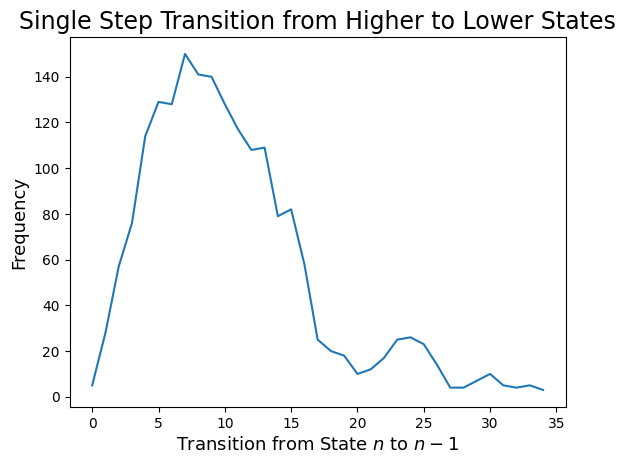

In [36]:
plt.plot(val)
plt.xlabel(r"Transition from State $n$ to $n-1$", fontsize=13)
plt.ylabel("Frequency", fontsize=13)
plt.title("Single Step Transition from Higher to Lower States", fontsize=17)
plt.show()

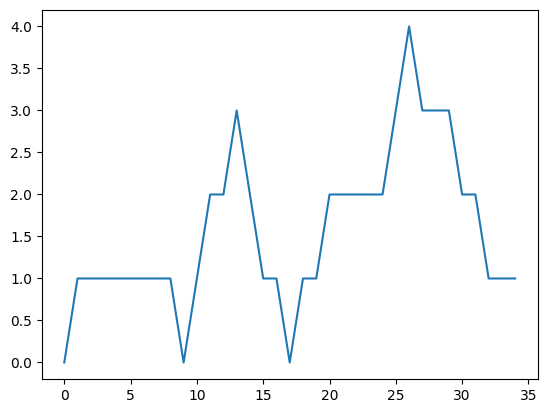

In [40]:
test_vals = [0,1,1,1,1,1,1,1,1,0,1,2,2,3,2,1,1,0,1,1,2,2,2,2,2,3,4,3,3,3,2,2,1,1,1]

plt.plot(test_vals)
plt.show()